In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer  #String to numeric.When maximum column is string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pickle
from sklearn.preprocessing import LabelEncoder

In [2]:
import nltk 
nltk.download('punkt')
nltk.download('stopwords') #Stopwords = commonly used english words
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aspir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aspir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
train_data = pd.read_csv("SMS_train.csv")
test_data = pd.read_csv('SMS_test.csv')

In [4]:
merged_df = pd.concat([train_data, test_data], ignore_index=True)

In [5]:
data = merged_df
data

,S. No.,Message_body,Label
0,1.0,Rofl. Its true to its name,Non-Spam
1,2.0,The guy did some bitching but I acted like i'd...,Non-Spam
2,3.0,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4.0,Will ü b going to esplanade fr home?,Non-Spam
4,5.0,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
1080,121.0,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
1081,122.0,Try to do something dear. You read something f...,Non-Spam
1082,123.0,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
1083,124.0,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [6]:
data.drop('S. No.',axis = 1)

,Message_body,Label
0,Rofl. Its true to its name,Non-Spam
1,The guy did some bitching but I acted like i'd...,Non-Spam
2,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,Will ü b going to esplanade fr home?,Non-Spam
4,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...
1080,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
1081,Try to do something dear. You read something f...,Non-Spam
1082,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
1083,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [7]:
data.isnull().sum

<bound method DataFrame.sum of       S. No.  Message_body  Label
0      False         False  False
1      False         False  False
2      False         False  False
3      False         False  False
4      False         False  False
...      ...           ...    ...
1080   False         False  False
1081   False         False  False
1082   False         False  False
1083   False         False  False
1084   False         False  False

[1085 rows x 3 columns]>

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   S. No.        1084 non-null   float64
 1   Message_body  1084 non-null   object 
 2   Label         1084 non-null   object 
dtypes: float64(1), object(2)
memory usage: 25.6+ KB


In [9]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1084 entries, 0 to 1084
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   S. No.        1084 non-null   float64
 1   Message_body  1084 non-null   object 
 2   Label         1084 non-null   object 
dtypes: float64(1), object(2)
memory usage: 33.9+ KB


In [10]:
le = LabelEncoder()
data['Label'] = le.fit_transform(data['Label'])
print(data['Label'])

0       0
1       0
2       0
3       0
4       1
       ..
1080    0
1081    0
1082    0
1083    0
1084    0
Name: Label, Length: 1084, dtype: int32


In [11]:
print(data['Label'].value_counts())

Label
0    884
1    200
Name: count, dtype: int64


In [12]:
stp_words = stopwords.words('english')
def clean_message(message):
    clean_message = " ".join(word for word in message.split() if word not in stp_words)
    return clean_message

data['Message_body'] = data['Message_body'].apply(clean_message)
print(data.Message_body)

0                                     Rofl. Its true name
1       The guy bitching I acted like i'd interested b...
2                Pity, * mood that. So...any suggestions?
3                       Will ü b going esplanade fr home?
4       This 2nd time tried 2 contact u. U £750 Pound ...
                              ...                        
1080    7 wonders My WORLD 7th You 6th Ur style 5th Ur...
1081         Try something dear. You read something exams
1082    Sun ah... Thk mayb dun anythin on... Thk book ...
1083    SYMPTOMS U love: "1.U like listening songs 2.U...
1084     Great. Have safe trip. Dont panic surrender all.
Name: Message_body, Length: 1084, dtype: object


In [13]:
data['Label'].value_counts()

Label
0    884
1    200
Name: count, dtype: int64

Label
0    884
1    200
Name: count, dtype: int64


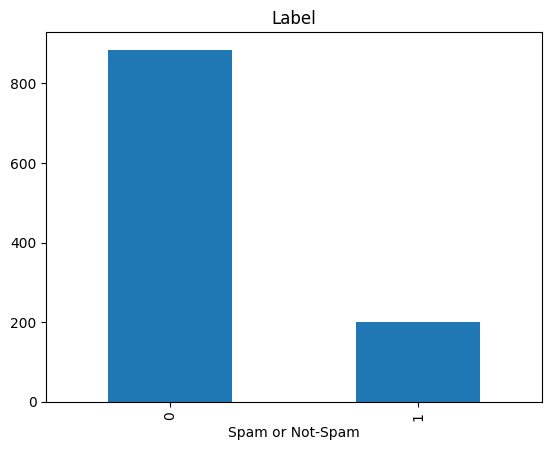

In [14]:
trans = data['Label'].value_counts()
print(trans)
trans.plot.bar()
plt.title('Label')
plt.xlabel("Spam or Not-Spam")
plt.show()

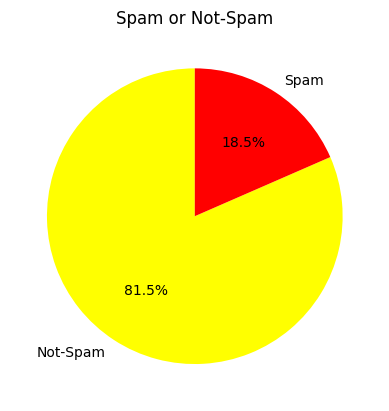

In [26]:
x = data['Label'].value_counts()
y = 'Not-Spam', 'Spam'

plt.pie(x,labels = y,autopct = '%1.1f%%',startangle = 90,colors = ['yellow','red'])
plt.title('Spam or Not-Spam')
plt.show()

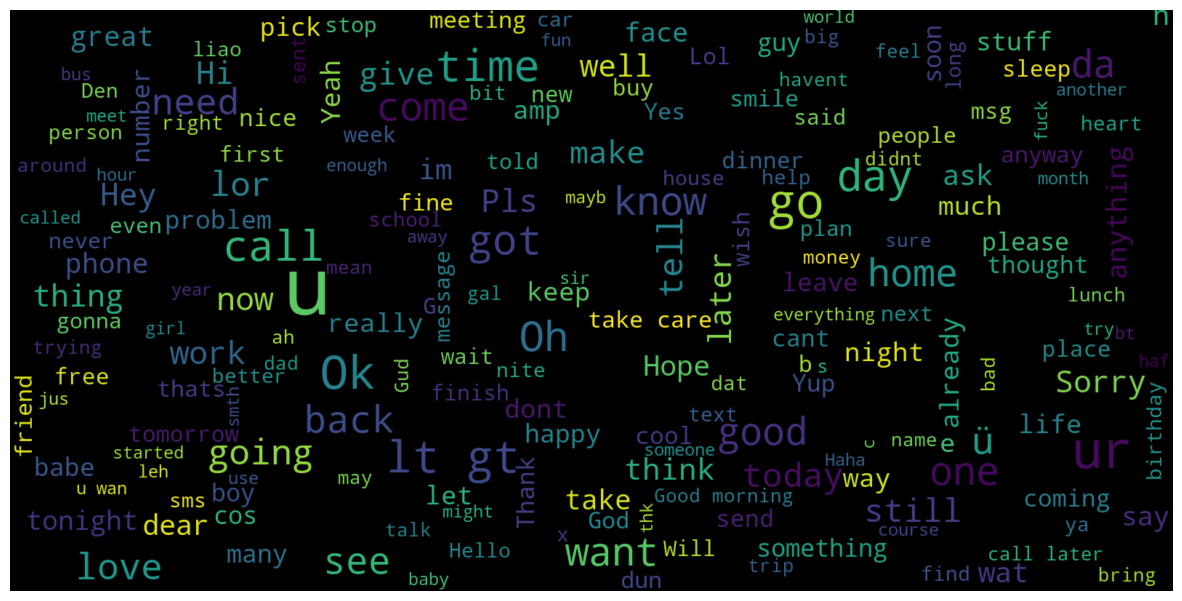

In [16]:
consolidated = ' '.join(word for word in data['Message_body'][data['Label'] == 0].astype(str))
wordCloud = WordCloud(width = 1600,height = 800,max_font_size = 110)
plt.figure(figsize = (15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation = 'bilinear')
plt.axis('off')
plt.show()

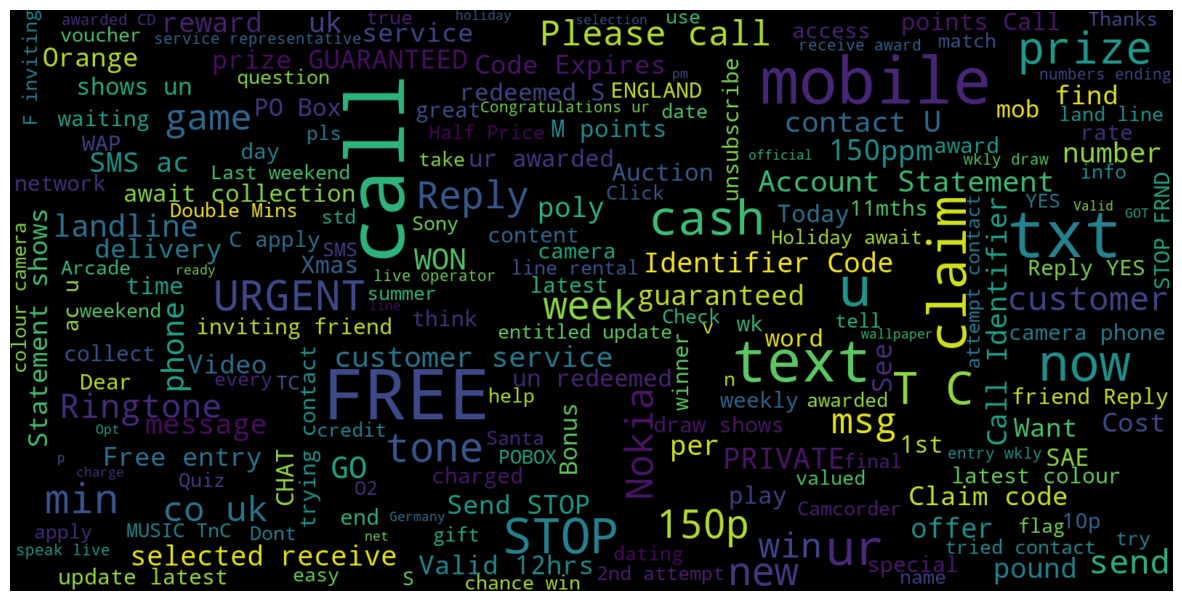

In [17]:
consolidated = ' '.join(word for word in data['Message_body'][data['Label'] == 1].astype(str))
wordCloud = WordCloud(width = 1600,height = 800,max_font_size = 110)
plt.figure(figsize = (15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [18]:
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data['Message_body']).toarray()
print(X)

Y = data['Label']


with open('cv.pkl','wb') as file:
    pickle.dump(cv, file)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [19]:
from imblearn.over_sampling import SMOTE

#Initialize SMOTE with a sampling strategy (you can adjust it as needed)
smote = SMOTE(sampling_strategy = 'auto',random_state = 42)

#Apply SMOTE to resample the dataset
X_resampled,y_resampled = smote.fit_resample(X,Y)
y_resampled.value_counts()

Label
0    884
1    884
Name: count, dtype: int64

In [20]:
x_train = pd.read_csv('SMS_train.csv')
x_test = pd.read_csv('SMS_test.csv')
y_train = pd.read_csv('SMS_train.csv')
y_test = pd.read_csv('SMS_test.csv')

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.30)

In [22]:
print(x_train)
print(x_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.20427801 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [23]:
print(x_train.shape)
print(x_test.shape)

(758, 2500)
(326, 2500)


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()

#Model fitting
model.fit(x_train,y_train)

#testing the model
pred = model.predict(x_test)

#model accuracy
print(accuracy_score(y_test,pred))
print(pred)

import pickle
pickle.dump(model,open('model_save.pkl','wb'))

model = pickle.load(open('model_save.pkl','rb'))

0.9478527607361963
[0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1
 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0]


In [25]:
def predict_sentiment(message_text):
    #Preprocess the input review
    cleaned_message = clean_message(message_text)
    #Transfrom the review using the TF-IDF vectorizer
    transformed_message = cv.transform([cleaned_message]).toarray()
    #Predict sentiment using the trained model
    prediction = model.predict(transformed_message)

    if prediction[0] == 1:
        return 'Spam'
    else:
        return 'Not-Spam'

#Now you can use the predict_sentiment function to classify reviews
input_message = input('Enter the review::')
result = predict_sentiment(input_message)
print(f'The mail is {result}')

Enter the review:: Congragulations you have won 100000! To quickly draw cash


The mail is Not-Spam
